# Related Work

Spam detection has been a major area of research in text classification, evolving significantly over the years. Initially, rule-based approaches were common, where systems relied on predefined lists of keywords or regular expressions to filter spam emails.
Naive Bayes classifiers became particularly popular because of their simplicity and effectiveness in handling text data.
Another widely-used approach is Support Vector Machines (SVM), which has shown strong performance in text classification. SVM is capable of handling high-dimensional data and has been used successfully to distinguish between spam and non-spam messages.

# Data Pre-Processing

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
file_path='/content/Spam_mails.csv'
spam_data=pd.read_csv(file_path)


In [3]:
spam_data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
spam_data.isna().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Drop the 'Email No.' column
spam_data_cleaned = spam_data.drop(columns=['Email No.'])

# Step 2: Check for missing values
print("Missing values per column:")
print(spam_data_cleaned.isnull().sum().sum())

# No missing values observed in the dataset; no further action required

# Step 3: Split features and target
X = spam_data_cleaned.drop(columns=['Prediction'])
y = spam_data_cleaned['Prediction']

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Balance the dataset using SMOTE if it's imbalanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 6: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Output summary
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")


Missing values per column:
0
Training data size: 5875 samples
Test data size: 1469 samples


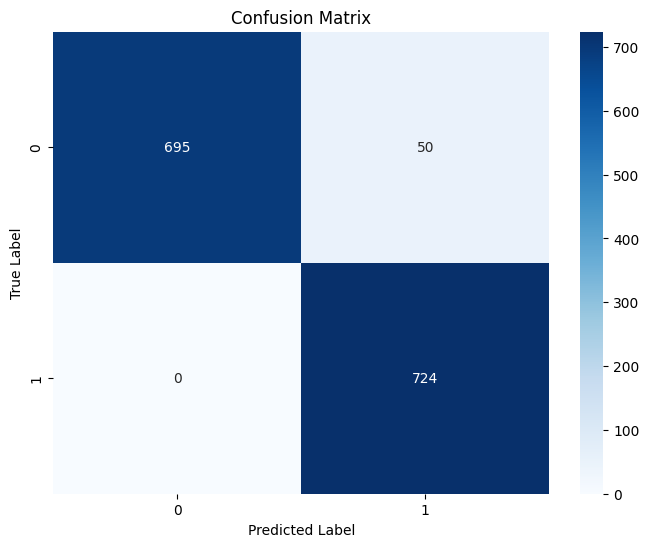

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       745
           1       0.94      1.00      0.97       724

    accuracy                           0.97      1469
   macro avg       0.97      0.97      0.97      1469
weighted avg       0.97      0.97      0.97      1469

Accuracy Score: 0.97
Top 10 Features by Importance:
       Feature  Importance
1688         z    0.523429
773     remove    0.499601
1727       gra    0.479419
1469      seen    0.462501
99        more    0.458043
20        your    0.448980
2937      porn    0.446153
1092       sex    0.437002
2618  campaign    0.424257
2926       ooo    0.423441


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Optional: Print feature importance for Logistic Regression
if hasattr(model, 'coef_'):
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
    print("Top 10 Features by Importance:")
    print(feature_importance.sort_values(by='Importance', ascending=False).head(10))



# Data Visualisation

<ipython-input-8-33496f3cd9f8>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prediction', data=data, palette='viridis')


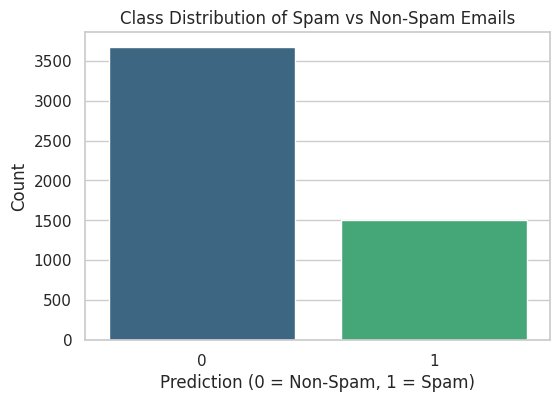

<ipython-input-8-33496f3cd9f8>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_word_freq.values, y=spam_word_freq.index, ax=axes[0], palette="rocket")
<ipython-input-8-33496f3cd9f8>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_spam_word_freq.values, y=non_spam_word_freq.index, ax=axes[1], palette="viridis")


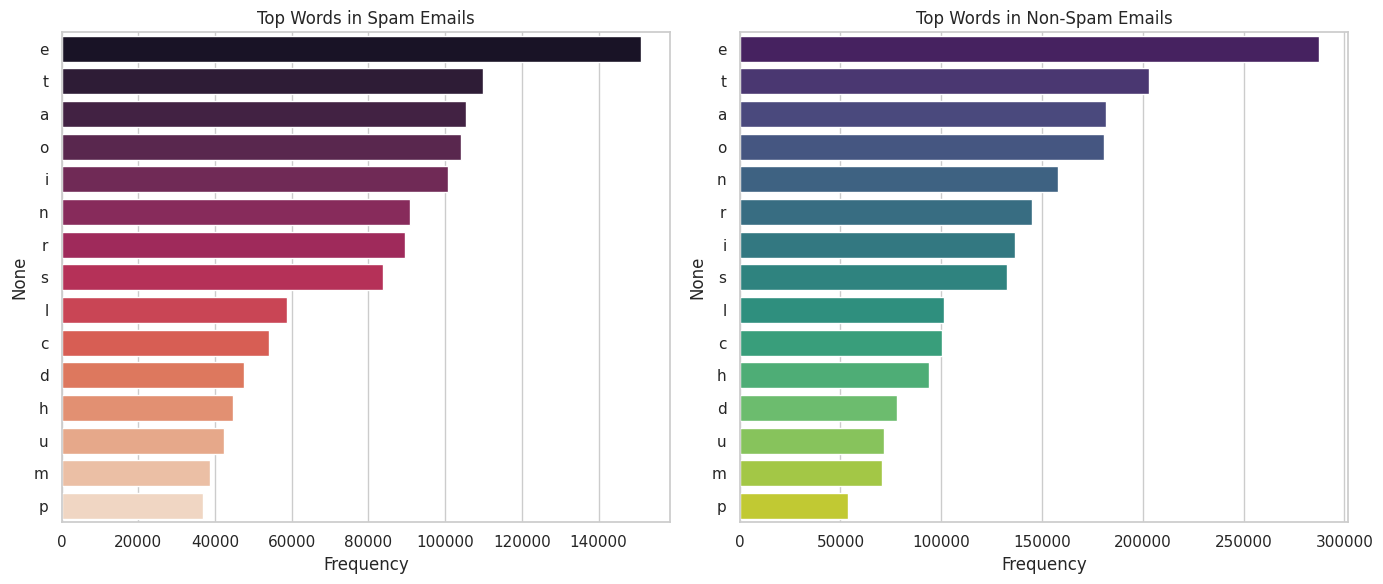

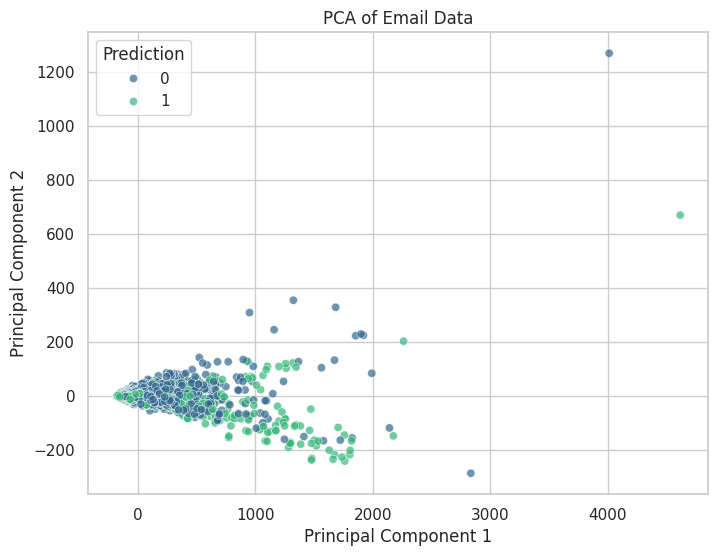

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd # Import pandas for DataFrame operations
from sklearn.impute import SimpleImputer  # Import SimpleImputer


# Setting up the style for the plots
sns.set(style="whitegrid")

# 1. Class Distribution Visualization
def plot_class_distribution(data):
    plt.figure(figsize=(6,4))
    sns.countplot(x='Prediction', data=data, palette='viridis')
    plt.title("Class Distribution of Spam vs Non-Spam Emails")
    plt.xlabel("Prediction (0 = Non-Spam, 1 = Spam)")
    plt.ylabel("Count")
    plt.show()

# 2. Word Frequency in Spam and Non-Spam Emails
def plot_word_frequencies(data, top_n=15):
    # Separate spam and non-spam emails
    spam_emails = data[data['Prediction'] == 1].drop(columns=['Email No.', 'Prediction'])
    non_spam_emails = data[data['Prediction'] == 0].drop(columns=['Email No.', 'Prediction'])

    # Calculate the sum of each word's occurrence in spam and non-spam emails
    spam_word_freq = spam_emails.sum().sort_values(ascending=False).head(top_n)
    non_spam_word_freq = non_spam_emails.sum().sort_values(ascending=False).head(top_n)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.barplot(x=spam_word_freq.values, y=spam_word_freq.index, ax=axes[0], palette="rocket")
    axes[0].set_title("Top Words in Spam Emails")
    axes[0].set_xlabel("Frequency")

    sns.barplot(x=non_spam_word_freq.values, y=non_spam_word_freq.index, ax=axes[1], palette="viridis")
    axes[1].set_title("Top Words in Non-Spam Emails")
    axes[1].set_xlabel("Frequency")

    plt.tight_layout()
    plt.show()

# 3. Dimensionality Reduction Visualization
def plot_pca(data, n_components=2):
    features = data.drop(columns=['Email No.', 'Prediction'])
    labels = data['Prediction']

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent'
    features_imputed = imputer.fit_transform(features)

    # PCA to reduce dimensions
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features_imputed)  # Use imputed features

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Prediction'] = labels.values

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Prediction', data=pca_df, palette='viridis', alpha=0.7)
    plt.title("PCA of Email Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Prediction", loc="best")
    plt.show()

# Assuming 'spam_data' is your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd # Import pandas for DataFrame operations
from sklearn.impute import SimpleImputer  # Import SimpleImputer


# Setting up the style for the plots
sns.set(style="whitegrid")

# 1. Class Distribution Visualization
def plot_class_distribution(data):
    plt.figure(figsize=(6,4))
    sns.countplot(x='Prediction', data=data, palette='viridis')
    plt.title("Class Distribution of Spam vs Non-Spam Emails")
    plt.xlabel("Prediction (0 = Non-Spam, 1 = Spam)")
    plt.ylabel("Count")
    plt.show()

# 2. Word Frequency in Spam and Non-Spam Emails
def plot_word_frequencies(data, top_n=15):
    # Separate spam and non-spam emails
    spam_emails = data[data['Prediction'] == 1].drop(columns=['Email No.', 'Prediction'])
    non_spam_emails = data[data['Prediction'] == 0].drop(columns=['Email No.', 'Prediction'])

    # Calculate the sum of each word's occurrence in spam and non-spam emails
    spam_word_freq = spam_emails.sum().sort_values(ascending=False).head(top_n)
    non_spam_word_freq = non_spam_emails.sum().sort_values(ascending=False).head(top_n)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.barplot(x=spam_word_freq.values, y=spam_word_freq.index, ax=axes[0], palette="rocket")
    axes[0].set_title("Top Words in Spam Emails")
    axes[0].set_xlabel("Frequency")

    sns.barplot(x=non_spam_word_freq.values, y=non_spam_word_freq.index, ax=axes[1], palette="viridis")
    axes[1].set_title("Top Words in Non-Spam Emails")
    axes[1].set_xlabel("Frequency")

    plt.tight_layout()
    plt.show()

# 3. Dimensionality Reduction Visualization
def plot_pca(data, n_components=2):
    features = data.drop(columns=['Email No.', 'Prediction'])
    labels = data['Prediction']

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent'
    features_imputed = imputer.fit_transform(features)

    # PCA to reduce dimensions
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features_imputed)  # Use imputed features

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Prediction'] = labels.values

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Prediction', data=pca_df, palette='viridis', alpha=0.7)
    plt.title("PCA of Email Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Prediction", loc="best")
    plt.show()

# Assuming 'spam_data' is your DataFrame
# Execute each visualization function, replacing 'data' with 'spam_data'
plot_class_distribution(spam_data)  # Pass the spam_data DataFrame
plot_word_frequencies(spam_data, top_n=15)
plot_pca(spam_data)
warnings.filterwarnings("ignore")

# Model Training

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/Spam_mails.csv')  # Replace with the path to your CSV file

# Separate features and labels
X = data.drop(columns=['Email No.', 'Prediction'])  # Adjust these column names if necessary
y = data['Prediction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the word count features
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy fpr model 1: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Accuracy: 97.78%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       739
           1       0.96      0.96      0.96       296

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/Spam_mails.csv')  # Replace with the path to your CSV file

# Separate features and labels
X = data.drop(columns=['Email No.', 'Prediction'])  # Adjust these column names if necessary
y = data['Prediction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Initialize the Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=100, random_state=88)

# Train the model on the word count features
model2.fit(X_train, y_train)

# Predict on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy for model 2: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Accuracy for model 2: 97.29%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       724
           1       0.96      0.95      0.95       311

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



As model 1 got more accuracy, we will be using model 1 for prediction purposes.


# Model Selection

Predicting the result using selected model.

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load the dataset to get the feature list and retrain the model
data = pd.read_csv('/content/Spam_mails.csv')
X = data.drop(columns=['Email No.', 'Prediction'])
y = data['Prediction']

# Train the Random Forest Classifier as before
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Initialize CountVectorizer with training vocabulary
vectorizer = CountVectorizer(vocabulary=X.columns)

def predict_email(email_text):
    # Step 1: Transform the input email text to word counts
    email_counts = vectorizer.transform([email_text])
    email_counts_df = pd.DataFrame(email_counts.toarray(), columns=X.columns)

    # Step 2: Predict using the trained model
    prediction = model.predict(email_counts_df)[0]

    # Step 3: Return the prediction result
    if prediction == 1:
        return "Spam"
    else:
        return "Not Spam"

# Example usage
email_text = input("Enter the email sample: ")
print(f"Prediction: {predict_email(email_text)}")


Enter the email sample: Congratulations! You've won a contest.
Prediction: Spam
